# Proyek Machine Learning : Recommendation System

* Topik  : Rekomendasi Produk
* Tujuan : Memberikan rekomendasi restoran berdasarkan preferensi konsumen dengan memanfaatkan popularitas dan sistem rekomendasi kolaboratif

* Dataset yang digunakan : https://www.kaggle.com/uciml/restaurant-data-with-consumer-ratings?select=rating_final.csv

## Melakukan Import terhadap Library yang diperlukan

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.sparse

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

from scipy.sparse.linalg import svds
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from pandas import read_csv

## DATA UNDERSTANDING

### Memuat Dataset ***rating_final.csv*** pada variabel **"df"**

In [6]:
df = read_csv('drive/MyDrive/csv/rating_final.csv')

In [7]:
df.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


### Menampilkan distribusi rating pada dataset "df"

In [8]:
df.describe()

,placeID,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000,1161.000000
mean,134192.041344,1.199828,1.215332,1.090439
std,1100.916275,0.773282,0.792294,0.790844
min,132560.000000,0.000000,0.000000,0.000000
25%,132856.000000,1.000000,1.000000,0.000000
50%,135030.000000,1.000000,1.000000,1.000000
75%,135059.000000,2.000000,2.000000,2.000000
max,135109.000000,2.000000,2.000000,2.000000


### Menampilkan tipe data setiap kolom pada dataset "df"

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userID          1161 non-null   object
 1   placeID         1161 non-null   int64 
 2   rating          1161 non-null   int64 
 3   food_rating     1161 non-null   int64 
 4   service_rating  1161 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 45.5+ KB


### Menampilkan Informasi terkait dataset

In [11]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
userID,1161,138,U1061,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
placeID,1161,NaN,NaN,NaN,134192,1100.92,132560,132856,135030,135059,135109
rating,1161,NaN,NaN,NaN,1.19983,0.773282,0,1,1,2,2
food_rating,1161,NaN,NaN,NaN,1.21533,0.792294,0,1,1,2,2
service_rating,1161,NaN,NaN,NaN,1.09044,0.790844,0,0,1,2,2


### Exploratory Data Analysis (EDA)
<ul type="none">
  <li>Tahap eksplorasi penting untuk memahami variabel-variabel pada data serta korelasi antar variabel. Pemahaman terhadap variabel pada data dan korelasinya akan membantu kita dalam menentukan pendekatan atau algoritma yang cocok untuk data kita. Idealnya, kita melakukan eksplorasi data terhadap seluruh variabel.</li>
<hr>
  <li>Exploratory Data Analysis (EDA) memiliki peranan penting untuk dapat memahami dataset secara baik dan detail.
  </li>
</ul>



**Beberapa pertanyaan yang akan kita jawab dengan menggunakan EDA:**
* Jumlah pengguna unik, restoran unik, no. rating, food_ratings, service_ratings
* Berapa kali pengguna menilai
* Berapa kali restoran dinilai
* Bagaimana distribusi peringkat untuk makanan, layanan?

Kita akan mengeksplorasi data sesuai dengan pertanyaan diatas.

### Jumlah user unik, restaurant unik, rating, rating makanan, dan rating layanan yang diberikan

In [12]:
print('unique users: ', df['userID'].nunique())
print('unique restaurant: ', df['placeID'].nunique())
print('Total number of ratings given: ', df['rating'].count())
print('Total number of food ratings given: ', df['food_rating'].count())
print('Total number of service ratings provided: ', df['service_rating'].count())

unique users:  138
unique restaurant:  130
Total number of ratings given:  1161
Total number of food ratings given:  1161
Total number of service ratings provided:  1161


### Menampilkan informasi terkait berapa kali user/pengguna melakukan penilaian 

In [13]:
most_rated_users = df['userID'].value_counts()
most_rated_users

U1061    18
U1106    18
U1134    16
U1024    15
U1135    14
         ..
U1021     3
U1031     3
U1047     3
U1107     3
U1039     3
Name: userID, Length: 138, dtype: int64

### Menampilkan informasi terkait berapa kali restoran memperoleh penilaian

In [14]:
most_rated_restaurants = df['placeID'].value_counts()
most_rated_restaurants

135085    36
132825    32
135032    28
135052    25
132834    25
          ..
135016     3
132766     3
134975     3
132668     3
135011     3
Name: placeID, Length: 130, dtype: int64

### Menampilkan visualisasi data distribusi rating

<Figure size 576x360 with 0 Axes>

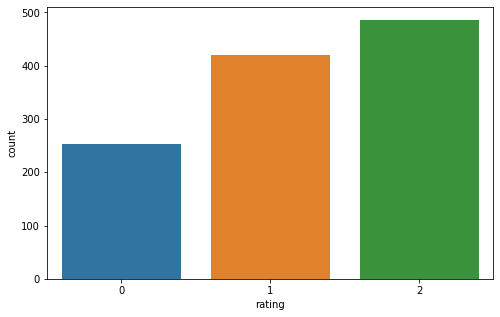

In [15]:
plt.figure(figsize = (8,5))
sns.countplot(df['rating'])

### Menampilkan visualisasi data distribusi rating makanan

<Figure size 576x360 with 0 Axes>

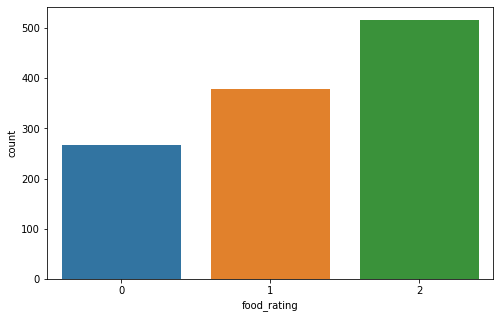

In [16]:
plt.figure(figsize = (8,5))
sns.countplot(df['food_rating'])

### Menampilkan visualisasi data distribusi rating layanan

<Figure size 576x360 with 0 Axes>

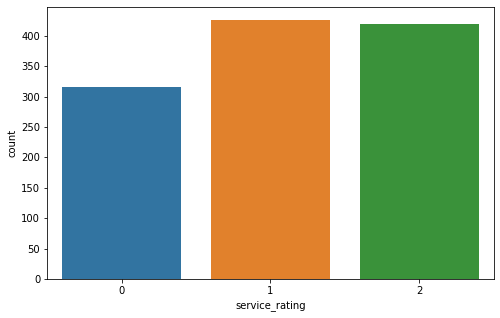

In [17]:
plt.figure(figsize = (8,5))
sns.countplot(df['service_rating'])

Setelah melakukan **Exploratory Data Analysis (EDA)**, kita memperoleh hasil:

- Semua (130) restoran dinilai minimal 3 kali dalam skala 0 hingga 2
- Semua (138) pengguna telah memberi peringkat minimal 3 kali

Untuk merekomendasikan restoran dengan preferensi teratas, kita dapat meminta setiap pengguna memberi peringkat terhadap semua restoran. Namun tentunya hal tersebut sedikit sulit dicapai. Solusinya kita akan mencoba memprediksi peringkat yang akan diberikan pengguna terhadap restoran.



### Membuat sekumpulan data yang memuat informasi pengguna yang aktif memberi peringkat setidaknya n kali


In [20]:
n = 3
user_counts = most_rated_users[most_rated_users > n]
len(user_counts)
user_counts

128

U1061    18
U1106    18
U1134    16
U1024    15
U1135    14
         ..
U1121     4
U1127     4
U1052     4
U1060     4
U1129     4
Name: userID, Length: 128, dtype: int64

#### Banyak rating yang diberikan

In [21]:
user_counts.sum()

1131

#### Semua data rating yang diberikan pengguna

In [24]:
data_final = df[df['userID'].isin(user_counts.index)]
data_final

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1155,U1043,132732,1,1,1
1156,U1043,132630,1,1,1
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


## DATA PREPARATION

### Mengubah data menjadi matriks

In [26]:
final_ratings_matrix = data_final.pivot(index = 'userID', columns = 'placeID', values='rating').fillna(0)
final_ratings_matrix.head()

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,132626,132630,132654,132660,132663,132665,132667,132668,132706,132715,132717,132723,132732,132733,132740,132754,132755,132766,132767,132768,132773,132825,132830,132834,132845,132846,132847,132851,132854,132856,...,135044,135045,135046,135047,135048,135049,135050,135051,135052,135053,135054,135055,135057,135058,135059,135060,135062,135063,135064,135065,135066,135069,135070,135071,135072,135073,135074,135075,135076,135079,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
U1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
U1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Melakukan kalkulasi Densitas matriks


<ul type="none" align="justify">
  <li>
  Hal tersebut merupakan suatu cara untuk mengetahui banyak kemungkinan peringkat yang diberikan dan berapa tepatnya peringkat yang diberikan.
  </li>
</ul>

#### Banyak rating yang diberikan

In [29]:
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('Given num of ratings: ', given_num_of_ratings )

Given num of ratings:  884


#### Total banyaknya rating yang bisa diberikan

In [31]:
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('Possible num of ratings: ', possible_num_of_ratings)

Possible num of ratings:  16640


#### Menghitung Densitas matriks

In [32]:
density = (given_num_of_ratings / possible_num_of_ratings) * 100
print('density: {:4.2f}%'.format(density))

density: 5.31%


### Memeriksa nilai yang hilang (**missing values**) pada variabel data_final

In [33]:
data_final.isnull().sum()

userID            0
placeID           0
rating            0
food_rating       0
service_rating    0
dtype: int64

* **NOTE** : Kita dapat melihat bahwa variabel data_final tidak memiliki nilai yang hilang (**missing value**). Dapat disimpulkan bahwa data telah bersih dan telah siap untuk dimasukkan ke dalam pemodelan.

## Modeling and Result

Pada bagian ***Modeling***, kita akan menggunakan algoritma:
- Popularity based Recommender Model
- Collaborative Filtering Model

### Popularity Based Recommender Model
Rekomendasi ini didasari apa yang sedang populer/trend. Ini akan berguna ketika kita tidak memiliki data historis sebagai referensi didalam merekomendasikan suatu produk terhadap pengguna.

**Hal yang dapat dilakukan:**
* Jumlah pengguna yang telah memberi peringkat restoran
* Memberi peringkat berdasarkan skor
* Merekomendasikan tempat populer/trend

#### Jumlah user rating 

In [35]:
data_grouped = df.groupby('placeID').agg({'userID':'count'}).reset_index()
data_grouped.rename(columns = {'userID': 'score'}, inplace = True )
data_sort = data_grouped.sort_values(['score','placeID'], ascending = False)
data_sort.head()

,placeID,score
123,135085,36
31,132825,32
80,135032,28
98,135052,25
33,132834,25


#### Peringkat berdasarkan nilai scores

In [36]:
data_sort['Rank'] = data_sort['score'].rank(ascending = 0, method = 'first')
pop_recom = data_sort
pop_recom.head()

,placeID,score,Rank
123,135085,36,1.0
31,132825,32,2.0
80,135032,28,3.0
98,135052,25,4.0
33,132834,25,5.0


In [38]:
print('List of most popular restaurants')
pop_recom[['placeID','score','Rank']].head()

List of most popular restaurants


,placeID,score,Rank
123,135085,36,1.0
31,132825,32,2.0
80,135032,28,3.0
98,135052,25,4.0
33,132834,25,5.0


##### **NOTE :** karena rekomendasi ini berdasarkan popularitas dan tidak dipersonalisasi, sehingga rekomendasi tetap sama untuk semua pengguna.

### Collaborative Filtering Model

Menggunakan model based collaborative filtering : SVD(Singular Value Decomposition)

**Beberapa hal yang harus dilakukan:**
* Mengubah data menjadi tabel pivot -> Format diperlukan untuk model colab
* Membuat kolom user_index untuk menghitung no.pengguna -> mengubah konvensi penamaan pengguna dengan menggunakan penghitung
* Menerapkan metode SVD pada matriks sparse besar -> untuk memprediksi peringkat untuk semua restoran yang tidak diberi peringkat oleh pengguna
* Memprediksi peringkat untuk semua restoran yang tidak dinilai oleh pengguna menggunakan SVD
* Membungkus semuanya menjadi sebuah fungsi

#### Mengubah data menjadi pivot table

In [39]:
pivot_data = data_final.pivot(index = 'userID', columns = 'placeID', values = 'rating').fillna(0)
pivot_data.shape
pivot_data.head()

(128, 130)

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,132626,132630,132654,132660,132663,132665,132667,132668,132706,132715,132717,132723,132732,132733,132740,132754,132755,132766,132767,132768,132773,132825,132830,132834,132845,132846,132847,132851,132854,132856,...,135044,135045,135046,135047,135048,135049,135050,135051,135052,135053,135054,135055,135057,135058,135059,135060,135062,135063,135064,135065,135066,135069,135070,135071,135072,135073,135074,135075,135076,135079,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
U1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
U1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Membuat kolom user_index untuk menghitung no.pengguna

In [40]:
pivot_data['user_index'] = np.arange(0, pivot_data.shape[0],1)
pivot_data.head()

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,132626,132630,132654,132660,132663,132665,132667,132668,132706,132715,132717,132723,132732,132733,132740,132754,132755,132766,132767,132768,132773,132825,132830,132834,132845,132846,132847,132851,132854,132856,...,135045,135046,135047,135048,135049,135050,135051,135052,135053,135054,135055,135057,135058,135059,135060,135062,135063,135064,135065,135066,135069,135070,135071,135072,135073,135074,135075,135076,135079,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109,user_index
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
U1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
U1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
U1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3
U1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [41]:
pivot_data.set_index(['user_index'], inplace = True)
pivot_data.head()

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,132626,132630,132654,132660,132663,132665,132667,132668,132706,132715,132717,132723,132732,132733,132740,132754,132755,132766,132767,132768,132773,132825,132830,132834,132845,132846,132847,132851,132854,132856,...,135044,135045,135046,135047,135048,135049,135050,135051,135052,135053,135054,135055,135057,135058,135059,135060,135062,135063,135064,135065,135066,135069,135070,135071,135072,135073,135074,135075,135076,135079,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
user_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Menerapkan metode SVD pada matriks sparse besar

In [45]:
# SVD
U,s, VT = svds(pivot_data, k = 10)

# Kontruksi diagonal array di SVD
sigma = np.diag(s)

##### Menerapkan SVD akan menamai 3 parameter output

In [46]:
# Matriks Ortogonal
print("U = ",U)

U =  [[ 2.78715782e-02  2.91618540e-02 -7.70811695e-02 ...  4.87700614e-02
   3.93023517e-02 -7.74356179e-02]
 [-3.24688962e-02 -8.01036269e-02  2.06369536e-01 ...  7.98147645e-02
  -2.17442564e-02 -1.32574089e-01]
 [ 2.51297171e-01  7.30422012e-02  1.15762870e-01 ...  7.96291336e-02
  -2.38070423e-01 -1.26700572e-01]
 ...
 [-2.10835270e-17 -2.26416446e-18 -9.24922648e-17 ... -1.18176670e-16
   2.13050191e-17  1.17210120e-17]
 [-1.28161536e-01 -2.45862716e-01 -3.70810741e-02 ... -9.95513466e-02
  -1.42823533e-01 -7.57573476e-02]
 [ 6.22639806e-02 -1.84539855e-01  2.04435481e-01 ...  1.16345218e-01
  -1.73077175e-01 -2.10689444e-01]]


In [48]:
#Nilai tunggal
print("S = ",s) 

S =  [ 7.51719179  7.67564253  8.13565563  8.35409151  8.83110639  9.18332145
  9.18346565  9.70983532 12.38003756 18.97979143]


In [49]:
 #Transpose matriks ortogonal
print("VT = ", VT)

VT =  [[-5.00834278e-18 -5.71383702e-18  2.32144433e-18 ...  9.18664897e-03
   8.29136455e-02 -8.08432317e-18]
 [-7.97701369e-18 -1.47097763e-17 -1.37055600e-17 ... -1.05422539e-01
   1.25026162e-01 -6.97498304e-17]
 [-3.48557671e-18 -6.32516758e-18  1.76192454e-19 ...  2.77408491e-02
   1.66641167e-01 -8.22627055e-18]
 ...
 [ 1.64073809e-18 -6.95923399e-19 -2.39756544e-18 ... -3.85740132e-02
  -2.02163397e-01 -4.05594887e-17]
 [-1.55131891e-18 -3.16042082e-18 -6.25851421e-19 ...  6.36178494e-02
   6.64576747e-02 -4.65411677e-19]
 [-1.47736065e-19 -7.04692071e-19  5.89083928e-19 ... -8.11818497e-02
  -2.39499523e-02 -2.32911571e-18]]


##### **NOTE :** Dapat kita lihat bahwa untuk matriks sparse, dapat menggunakan fungsi sparse.linalg.svds() untuk melakukan dekomposisi. SVD berguna untuk: kompresi data, pengurangan kebisingan mirip dengan Analisis Komponen Utama dan pengindeksan Semantik Laten (LSI), digunakan dalam pengambilan dokumen dan kesamaan kata dalam penambangan teks.

In [50]:
# Prediksi peringkat untuk semua restoran yang tidak dinilai oleh pengguna menggunakan SVD
all_user_predicted_ratings = np.dot(np.dot(U,sigma), VT)

# Prediksi rating
pred_data = pd.DataFrame(all_user_predicted_ratings, columns = pivot_data.columns)
pred_data.head()

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,132626,132630,132654,132660,132663,132665,132667,132668,132706,132715,132717,132723,132732,132733,132740,132754,132755,132766,132767,132768,132773,132825,132830,132834,132845,132846,132847,132851,132854,132856,...,135044,135045,135046,135047,135048,135049,135050,135051,135052,135053,135054,135055,135057,135058,135059,135060,135062,135063,135064,135065,135066,135069,135070,135071,135072,135073,135074,135075,135076,135079,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
0,-8.421649e-18,6.676406e-19,-1.334851e-17,0.175423,1.719208e-16,-4.268592e-18,-4.305525e-18,-1.645745e-17,-9.476520e-18,1.509704e-19,-1.736898e-17,-6.488763e-18,-3.897727e-18,-2.200107e-17,-6.150533e-18,-1.736898e-17,-6.098103e-18,-6.469791e-18,-1.476661e-17,-6.469791e-18,-6.878719e-18,0.094374,-2.142860e-17,3.987642e-18,-4.916279e-18,0.357536,0.088069,7.500516e-17,2.885252e-16,6.107256e-16,1.238991e-16,1.104190,0.054650,0.053558,0.014313,0.030465,0.033142,0.039275,0.019901,0.144079,...,0.047968,0.054698,-0.002369,0.408979,0.182196,-0.058854,-0.013648,0.392426,0.642341,-0.108530,0.078160,-0.013801,0.086165,-0.303805,0.316650,0.225509,0.251313,0.265444,0.041419,-0.128250,-0.195189,0.030198,0.031275,0.077813,-0.186948,0.091709,0.050084,0.367079,0.012244,-0.092594,0.141167,0.204458,0.066725,0.227847,-0.049773,1.207990e-16,-9.093806e-20,0.217707,0.119304,1.164372e-16
1,-6.332669e-18,1.042627e-18,-1.634822e-18,0.204657,2.750904e-16,-3.680833e-17,-2.045148e-17,-1.363784e-17,-8.938525e-18,-6.112350e-17,-4.877040e-18,-3.445616e-17,-1.146307e-18,-1.431896e-17,-2.149091e-17,-4.877040e-18,-3.332758e-17,-5.694321e-20,-1.337989e-17,-5.694321e-20,-1.577879e-18,0.439186,-2.647975e-17,-5.321141e-17,-2.716864e-17,0.183759,0.394376,1.409468e-16,1.218377e-16,1.012661e-15,1.438462e-16,0.936704,-0.034819,0.598855,0.000954,-0.065169,-0.064680,0.012051,0.029160,0.234531,...,0.030265,0.591575,0.150778,-0.107875,0.071751,0.172928,-0.036338,0.666436,1.147075,-0.382132,0.073745,0.008285,0.084022,-0.361236,0.707896,0.423233,0.872998,-0.192323,0.083784,-0.082329,0.230301,0.020604,0.052505,-0.051517,0.174143,-0.039834,0.055066,0.554255,0.037732,0.170682,0.196347,0.099066,0.031653,1.276811,-0.040446,2.526783e-16,-4.654034e-17,0.401924,0.082374,1.377859e-16
2,-3.661718e-17,-1.112988e-17,-2.123464e-17,0.274472,-2.424094e-16,-4.904669e-17,-4.845603e-17,-5.916150e-17,-1.398136e-17,-8.081985e-17,-3.047405e-17,-6.702083e-17,-4.278300e-18,-7.719200e-17,-4.560223e-17,-3.047405e-17,-7.676442e-17,-1.997373e-17,-1.949866e-17,-1.997373e-17,-1.260912e-18,1.388201,-9.492219e-17,-8.611333e-17,-6.085924e-17,1.603227,1.067114,-9.951542e-17,3.329833e-16,-7.978321e-16,-8.434105e-17,2.234381,0.000840,0.856515,0.045062,-0.071674,-0.063582,0.177527,0.141250,-0.246338,...,0.165486,-0.360265,0.068556,0.384836,0.443239,0.484909,0.023105,-0.177720,0.539749,0.025602,0.130554,0.397389,-0.188523,0.000155,1.980402,-0.161897,0.053568,-0.271992,0.512590,0.150307,-0.221663,0.008745,0.044273,0.062766,-0.064297,-0.209689,0.182274,1.384122,-0.012311,1.102103,0.946897,0.220074,0.039438,0.559835,0.299039,-2.567146e-16,-7.207628e-17,0.034631,0.153178,-1.436026e-16
3,1.657601e-17,3.456494e-17,2.522644e-17,0.480896,6.682337e-16,4.979103e-17,3.745659e-17,1.863045e-17,1.098856e-17,1.672658e-17,4.938674e-17,-7.994560e-18,2.168267e-17,5.145442e-17,2.217111e-17,4.938674e-17,6.772150e-17,2.530245e-18,5.209922e-17,2.530245e-18,2.269620e-17,0.414563,2.846610e-17,5.086924e-17,4.471843e-17,-0.143641,-0.054362,2.609849e-16,-6.815536e-17,2.300040e-15,3.471064e-16,-0.024541,0.128258,0.042332,-0.048636,0.133098,0.125720,-0.175170,-0.107790,0.489595,...,-0.059119,0.345425,0.277957,0.117153,0.463455,0.112815,0.100405,0.413399,0.168809,0.029483,-0.106255,0.196990,0.049124,-0.016290,-0.672381,0.568488,0.862469,0.446370,0.062209,-0.323795,0.173484,-0.016668,0.016854,0.027915,0.308671,0.172175,0.133474,0.414595,0.136508,-0.439354,0.022667,0.051184,-0.0351

#### **Membungkus semua menjadi sebuah fungsi**

Beberapa hal yang harus kita dilakukan:

- Membuat fungsi untuk merekomendasikan tempat dengan peringkat prediksi tertinggi
- Menggunakan fungsi untuk merekomendasikan tempat berdasarkan ID pengguna, peringkat sebelumnya, peringkat yang diprediksi, jumlah tempat

##### Merekomendasikan tempat dengan rating prediksi tertinggi

In [55]:
def recommend_places(userID, pivot_data, pred_data, num_recommendations):
  
  # Index mulai dari 0
  user_index = userID-1 

  # Mengsorting rating pengguna
  sorted_user_ratings = pivot_data.iloc[user_index].sort_values(ascending = False) 

  # Prediksi pengguna yang tersortir
  sorted_user_predictions = pred_data.iloc[user_index].sort_values(ascending = False) 

  temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
  temp.index.name = 'Recommended Place ID'
  temp.columns = ['user_ratings', 'user_predictions']
  temp = temp.loc[temp.user_ratings == 0]
  temp = temp.sort_values('user_predictions', ascending = False)

  print('\n Recommended place ID for Customers --> (user_id = {}):\n'.format(userID))
  print(temp.head(num_recommendations))

In [57]:
# Rekomendasi tempat berdasarkan pada userID, past ratings, predicted ratings, num of places
userID = 26
num_recommendations = 10
recommend_places(userID, pivot_data, pred_data, num_recommendations)


 Recommended place ID for Customers --> (user_id = 26):

                      user_ratings  user_predictions
Recommended Place ID                                
135075                         0.0          0.510513
132754                         0.0          0.463748
135052                         0.0          0.456283
132834                         0.0          0.386259
135079                         0.0          0.321052
132755                         0.0          0.313391
132723                         0.0          0.277505
135062                         0.0          0.241650
132951                         0.0          0.227298
135064                         0.0          0.214211


## EVALUATION

### Metrik Evaluasi Accuracy

In [64]:
X = data_sort.drop(['score'], axis=1)
y = data_sort['score']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state=256)

print(f'Total of sample in whole dataset: {len(X)}')
print(f'Total of sample in train dataset: {len(X_train)}')
print(f'Total of sample in test dataset: {len(X_test)}')

Total of sample in whole dataset: 130
Total of sample in train dataset: 104
Total of sample in test dataset: 26


In [73]:
# Melatih binary classifier menggunakan Algoritma Random Forest dengan Hyperparameter default
classifier = RandomForestClassifier(random_state=19)
classifier.fit(X_train, y_train)

# X_test, y_test sebagai test data points
predictions = classifier.predict(X_test)

# Menghitung akurasi pengklasifikasi
print("\nAccuracy of the classifier is: ", accuracy_score(y_test, predictions))

RandomForestClassifier(random_state=19)


Accuracy of the classifier is:  0.8076923076923077


### Metrik Evaluasi Precision

In [76]:
# Menghitung skor presisi pengklasifikasi
print("Precision Score of the classifier is: ", precision_score(y_test, predictions, pos_label='positive', average='micro' ))


Precision Score of the classifier is:  0.8076923076923077


### Evaluasi model menggunakan RMSE

RMSE adalah akar kuadrat dari rata-rata kuadrat error. Pengaruh setiap kesalahan pada RMSE sebanding dengan ukuran kesalahan kuadrat, sehingga kesalahan yang lebih besar memiliki efek besar yang tidak proporsional pada RMSE. Akibatnya, RMSE sensitif terhadap outlier.


**Beberapa hal yang harus kita dilakukan:**
* Peringkat aktual yang diberikan oleh pengguna
* Peringkat yang diprediksi untuk suatu tempat
* Hitung RMSE

#### Peringkat aktual yang diberikan oleh pengguna

In [79]:
final_ratings_matrix.head()

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,132626,132630,132654,132660,132663,132665,132667,132668,132706,132715,132717,132723,132732,132733,132740,132754,132755,132766,132767,132768,132773,132825,132830,132834,132845,132846,132847,132851,132854,132856,...,135044,135045,135046,135047,135048,135049,135050,135051,135052,135053,135054,135055,135057,135058,135059,135060,135062,135063,135064,135065,135066,135069,135070,135071,135072,135073,135074,135075,135076,135079,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
U1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
U1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Rata-rata peringkat aktual untuk setiap tempat

In [78]:
final_ratings_matrix.mean().head()

placeID
132560    0.015625
132561    0.023438
132564    0.023438
132572    0.117188
132583    0.031250
dtype: float64

#### Prediksi peringkat suatu tempat

In [80]:
pred_data.head()

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,132626,132630,132654,132660,132663,132665,132667,132668,132706,132715,132717,132723,132732,132733,132740,132754,132755,132766,132767,132768,132773,132825,132830,132834,132845,132846,132847,132851,132854,132856,...,135044,135045,135046,135047,135048,135049,135050,135051,135052,135053,135054,135055,135057,135058,135059,135060,135062,135063,135064,135065,135066,135069,135070,135071,135072,135073,135074,135075,135076,135079,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
0,-8.421649e-18,6.676406e-19,-1.334851e-17,0.175423,1.719208e-16,-4.268592e-18,-4.305525e-18,-1.645745e-17,-9.476520e-18,1.509704e-19,-1.736898e-17,-6.488763e-18,-3.897727e-18,-2.200107e-17,-6.150533e-18,-1.736898e-17,-6.098103e-18,-6.469791e-18,-1.476661e-17,-6.469791e-18,-6.878719e-18,0.094374,-2.142860e-17,3.987642e-18,-4.916279e-18,0.357536,0.088069,7.500516e-17,2.885252e-16,6.107256e-16,1.238991e-16,1.104190,0.054650,0.053558,0.014313,0.030465,0.033142,0.039275,0.019901,0.144079,...,0.047968,0.054698,-0.002369,0.408979,0.182196,-0.058854,-0.013648,0.392426,0.642341,-0.108530,0.078160,-0.013801,0.086165,-0.303805,0.316650,0.225509,0.251313,0.265444,0.041419,-0.128250,-0.195189,0.030198,0.031275,0.077813,-0.186948,0.091709,0.050084,0.367079,0.012244,-0.092594,0.141167,0.204458,0.066725,0.227847,-0.049773,1.207990e-16,-9.093806e-20,0.217707,0.119304,1.164372e-16
1,-6.332669e-18,1.042627e-18,-1.634822e-18,0.204657,2.750904e-16,-3.680833e-17,-2.045148e-17,-1.363784e-17,-8.938525e-18,-6.112350e-17,-4.877040e-18,-3.445616e-17,-1.146307e-18,-1.431896e-17,-2.149091e-17,-4.877040e-18,-3.332758e-17,-5.694321e-20,-1.337989e-17,-5.694321e-20,-1.577879e-18,0.439186,-2.647975e-17,-5.321141e-17,-2.716864e-17,0.183759,0.394376,1.409468e-16,1.218377e-16,1.012661e-15,1.438462e-16,0.936704,-0.034819,0.598855,0.000954,-0.065169,-0.064680,0.012051,0.029160,0.234531,...,0.030265,0.591575,0.150778,-0.107875,0.071751,0.172928,-0.036338,0.666436,1.147075,-0.382132,0.073745,0.008285,0.084022,-0.361236,0.707896,0.423233,0.872998,-0.192323,0.083784,-0.082329,0.230301,0.020604,0.052505,-0.051517,0.174143,-0.039834,0.055066,0.554255,0.037732,0.170682,0.196347,0.099066,0.031653,1.276811,-0.040446,2.526783e-16,-4.654034e-17,0.401924,0.082374,1.377859e-16
2,-3.661718e-17,-1.112988e-17,-2.123464e-17,0.274472,-2.424094e-16,-4.904669e-17,-4.845603e-17,-5.916150e-17,-1.398136e-17,-8.081985e-17,-3.047405e-17,-6.702083e-17,-4.278300e-18,-7.719200e-17,-4.560223e-17,-3.047405e-17,-7.676442e-17,-1.997373e-17,-1.949866e-17,-1.997373e-17,-1.260912e-18,1.388201,-9.492219e-17,-8.611333e-17,-6.085924e-17,1.603227,1.067114,-9.951542e-17,3.329833e-16,-7.978321e-16,-8.434105e-17,2.234381,0.000840,0.856515,0.045062,-0.071674,-0.063582,0.177527,0.141250,-0.246338,...,0.165486,-0.360265,0.068556,0.384836,0.443239,0.484909,0.023105,-0.177720,0.539749,0.025602,0.130554,0.397389,-0.188523,0.000155,1.980402,-0.161897,0.053568,-0.271992,0.512590,0.150307,-0.221663,0.008745,0.044273,0.062766,-0.064297,-0.209689,0.182274,1.384122,-0.012311,1.102103,0.946897,0.220074,0.039438,0.559835,0.299039,-2.567146e-16,-7.207628e-17,0.034631,0.153178,-1.436026e-16
3,1.657601e-17,3.456494e-17,2.522644e-17,0.480896,6.682337e-16,4.979103e-17,3.745659e-17,1.863045e-17,1.098856e-17,1.672658e-17,4.938674e-17,-7.994560e-18,2.168267e-17,5.145442e-17,2.217111e-17,4.938674e-17,6.772150e-17,2.530245e-18,5.209922e-17,2.530245e-18,2.269620e-17,0.414563,2.846610e-17,5.086924e-17,4.471843e-17,-0.143641,-0.054362,2.609849e-16,-6.815536e-17,2.300040e-15,3.471064e-16,-0.024541,0.128258,0.042332,-0.048636,0.133098,0.125720,-0.175170,-0.107790,0.489595,...,-0.059119,0.345425,0.277957,0.117153,0.463455,0.112815,0.100405,0.413399,0.168809,0.029483,-0.106255,0.196990,0.049124,-0.016290,-0.672381,0.568488,0.862469,0.446370,0.062209,-0.323795,0.173484,-0.016668,0.016854,0.027915,0.308671,0.172175,0.133474,0.414595,0.136508,-0.439354,0.022667,0.051184,-0.0351

#### Rata-rata prediksi rating untuk setiap tempat

In [81]:
pred_data.mean().head()

placeID
132560   -3.867083e-18
132561    1.132100e-18
132564   -4.460607e-18
132572    9.900262e-02
132583    3.323385e-02
dtype: float64

#### Kalkulasi nilai RMSE

In [83]:
rmse_data = pd.concat([final_ratings_matrix.mean(), pred_data.mean()], axis = 1)
rmse_data.columns = ['Avg_actual_rating', 'Avg_predicted_ratings']

print(rmse_data.shape)
rmse_data['place_index'] = np.arange(0, rmse_data.shape[0],1)
rmse_data.head()

(130, 2)


,Avg_actual_rating,Avg_predicted_ratings,place_index
placeID,,,
132560,0.015625,-3.867083e-18,0
132561,0.023438,1.132100e-18,1
132564,0.023438,-4.460607e-18,2
132572,0.117188,9.900262e-02,3
132583,0.031250,3.323385e-02,4


Text(0.5, 1.0, 'rmse_data')

Text(0, 0.5, 'root_mean_squared_error')

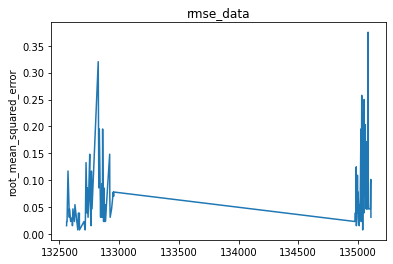

In [84]:
plt.plot(rmse_data['Avg_actual_rating'])
plt.title('rmse_data')
plt.ylabel('root_mean_squared_error')

plt.show()

Text(0.5, 1.0, 'rmse_data')

Text(0, 0.5, 'root_mean_squared_error')

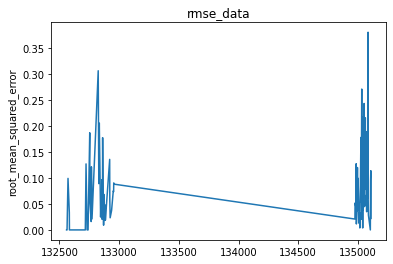

In [85]:
plt.plot(rmse_data['Avg_predicted_ratings'])
plt.title('rmse_data')
plt.ylabel('root_mean_squared_error')

plt.show()

#### Nilai RMSE pada SVD Model

In [86]:
RMSE = round((((rmse_data.Avg_actual_rating - rmse_data.Avg_predicted_ratings) ** 2).mean() ** 0.5),5)
print('\n RMSE SVD Model = {}\n'.format(RMSE))


 RMSE SVD Model = 0.01874



## CONCLUSION

Model rekomendasi berdasarkan `Popularity Based Recommender Model` tidak dipersonalisasi dan  didasarkan pada jumlah frekuensi, yang mungkin tidak sesuai untuk pengguna. Model merekomendasikan 5 tempat yang sama untuk semua pengguna tetapi model berbasis Collaborative Filtering dapat merekomendasikan seluruh daftar yang berbeda berdasarkan rating yang pengguna berikan.

Model rekomendasi berdasarkan `Collaborative Filtering`  adalah sistem rekomendasi yang dipersonalisasi, rekomendasi didasarkan pada perilaku/interaksi pengguna di masa lalu (historis) dan tidak bergantung pada informasi tambahan apa pun.